<a href="https://colab.research.google.com/github/com0040/python_MechinLearning_and_DeepLearning_Basic/blob/main/18_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [5]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size =0.1)

In [6]:
train_input.shape

(54000, 28, 28)

In [7]:
train_scaled = train_input.reshape(-1,28,28,1) / 255 # 흑백인지 알려주고 4차원으로 만든다. 후에 정규화(0~1사이)
val_scaled = val_input.reshape(-1,28,28,1) / 255
test_scaled = test_input.reshape(-1,28,28,1) / 255

In [11]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

hist = model.fit(train_scaled, train_target, epochs =10000, validation_data = (val_scaled,val_target),
                 callbacks = [es])

Epoch 1/10000
1688/1688 [==============================] - 55s 32ms/step - loss: 0.5190 - accuracy: 0.8126 - val_loss: 0.3547 - val_accuracy: 0.8693
Epoch 2/10000
1688/1688 [==============================] - 75s 44ms/step - loss: 0.3463 - accuracy: 0.8754 - val_loss: 0.2902 - val_accuracy: 0.8938
Epoch 3/10000
1688/1688 [==============================] - 70s 42ms/step - loss: 0.3049 - accuracy: 0.8893 - val_loss: 0.2685 - val_accuracy: 0.9025
Epoch 4/10000
1688/1688 [==============================] - 54s 32ms/step - loss: 0.2764 - accuracy: 0.8990 - val_loss: 0.2554 - val_accuracy: 0.9090
Epoch 5/10000
1688/1688 [==============================] - 53s 31ms/step - loss: 0.2528 - accuracy: 0.9083 - val_loss: 0.2478 - val_accuracy: 0.9065
Epoch 6/10000
1688/1688 [==============================] - 56s 33ms/step - loss: 0.2400 - accuracy: 0.9128 - val_loss: 0.2422 - val_accuracy: 0.9105
Epoch 7/10000
1688/1688 [==============================] - 53s 31ms/step - loss: 0.2231 - accuracy: 0.9185

In [12]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2461 - accuracy: 0.9105


[0.24609164893627167, 0.9104999899864197]

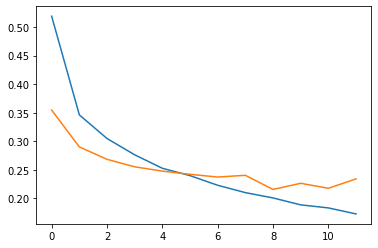

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])